<h1>Tree Cover Classification</h1>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline

Now we should load the train and test data into two seperate dataframes

In [2]:
train = pd.read_csv("tree_cover_input/train.csv")
test = pd.read_csv("tree_cover_input/test.csv")

# The following two lines determines the number of visible columns and 
#the number of visible rows for dataframes and that doesn't affect the code
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1 - Spruce/Fir
2 - Lodgepole Pine
3 - Ponderosa Pine
4 - Cottonwood/Willow
5 - Aspen
6 - Douglas-fir
7 - Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

Data Fields
Elevation - Elevation in meters
Aspect - Aspect in degrees azimuth
Slope - Slope in degrees
Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1 - Rawah Wilderness Area
2 - Neota Wilderness Area
3 - Comanche Peak Wilderness Area
4 - Cache la Poudre Wilderness Area

The soil types are:

1 Cathedral family - Rock outcrop complex, extremely stony.
2 Vanet - Ratake families complex, very stony.
3 Haploborolis - Rock outcrop complex, rubbly.
4 Ratake family - Rock outcrop complex, rubbly.
5 Vanet family - Rock outcrop complex complex, rubbly.
6 Vanet - Wetmore families - Rock outcrop complex, stony.
7 Gothic family.
8 Supervisor - Limber families complex.
9 Troutville family, very stony.
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
11 Bullwark - Catamount families - Rock land complex, rubbly.
12 Legault family - Rock land complex, stony.
13 Catamount family - Rock land - Bullwark family complex, rubbly.
14 Pachic Argiborolis - Aquolis complex.
15 unspecified in the USFS Soil and ELU Survey.
16 Cryaquolis - Cryoborolis complex.
17 Gateview family - Cryaquolis complex.
18 Rogert family, very stony.
19 Typic Cryaquolis - Borohemists complex.
20 Typic Cryaquepts - Typic Cryaquolls complex.
21 Typic Cryaquolls - Leighcan family, till substratum complex.
22 Leighcan family, till substratum, extremely bouldery.
23 Leighcan family, till substratum - Typic Cryaquolls complex.
24 Leighcan family, extremely stony.
25 Leighcan family, warm, extremely stony.
26 Granile - Catamount families complex, very stony.
27 Leighcan family, warm - Rock outcrop complex, extremely stony.
28 Leighcan family - Rock outcrop complex, extremely stony.
29 Como - Legault families complex, extremely stony.
30 Como family - Rock land - Legault family complex, extremely stony.
31 Leighcan - Catamount families complex, extremely stony.
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34 Cryorthents - Rock land complex, extremely stony.
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
40 Moran family - Cryorthents - Rock land complex, extremely stony.

<h1>1. Data Exploration and Analysis</h1>

Now we should go further to explore our data to be able to know which features to use and if we can synthesize new features. Now i will show the first 5 rows. 

In [3]:
train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [4]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


Let's now see how many data points we have for training.

In [5]:
print("The number of traning examples(data points) = %i " % train.shape[0])
print("The number of features we have = %i " % train.shape[1])

The number of traning examples(data points) = 15120 
The number of features we have = 56 


Let's check if any of the columns contains NaNs or Nulls so that we can fill those values if they are insignificant or drop them. We may drop a whole column if most of its values are NaNs or fill its value according to its relation with other columns in the dataframe. Nones can also be 0 in some datasets and that is why i am going to use the describe of the train to see if the range of numbers is not reasonable or not. if you are dropping rows with NaNs and you notice that you need to drop a large portion of your dataset then you should think about filling the NaN values or drop a column that has most of its values missing.

In [6]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [7]:
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


It seems we don't have any NaN or Null value among the dataset we are trying to classify. Let's now discover the correlation matrix for this dataset and see if we can combine features or drop some according to its correlation with the output labels.

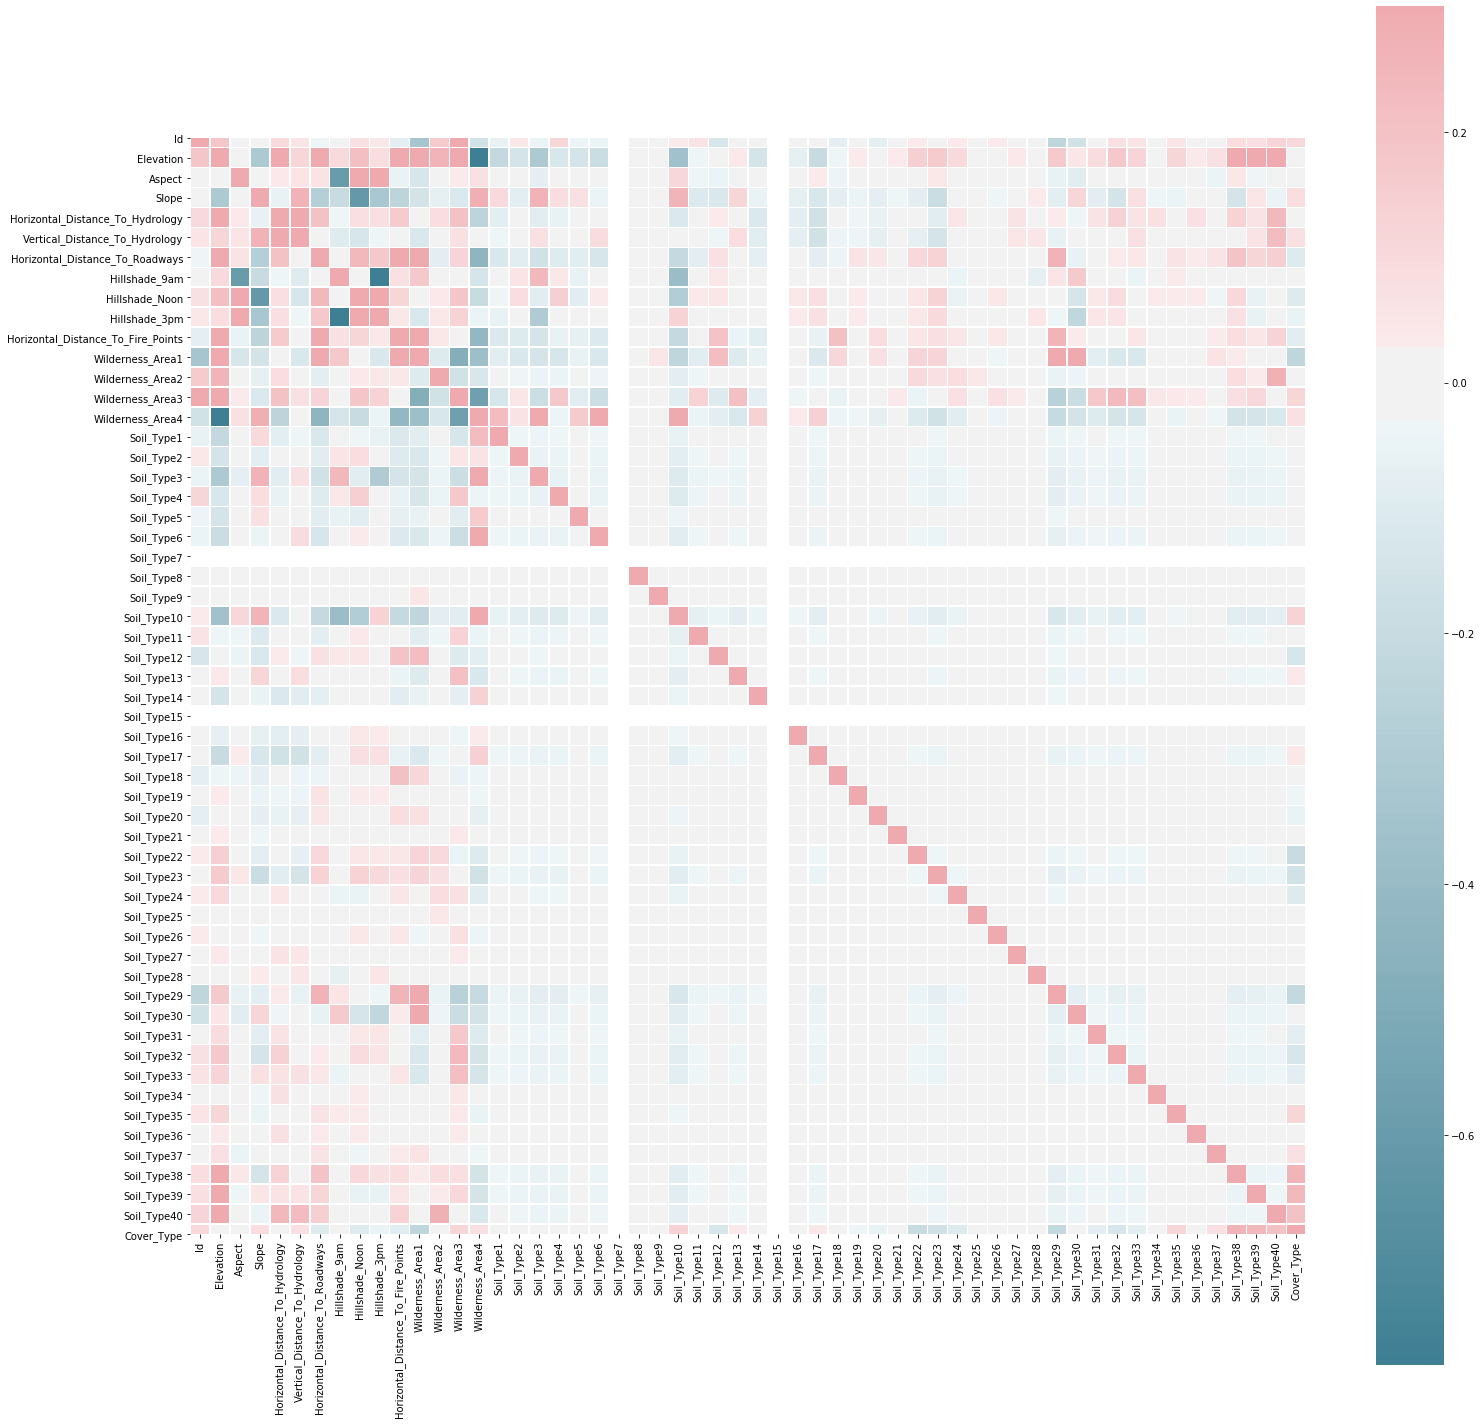

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = train.corr()
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)

In [9]:
corr

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,1.000000,0.185496,0.017702,-0.020168,0.099637,0.055348,-0.033028,0.000786,0.073123,0.042524,-0.068739,-0.339861,0.158484,0.384219,-0.158451,-0.058451,0.045545,-0.045757,0.118214,-0.041713,-0.046017,NaN,-0.013159,-0.014219,0.032292,0.063372,-0.129930,0.015145,-0.016034,NaN,-0.003794,-0.002940,-0.070252,-0.029707,-0.069537,0.014734,0.035739,-0.017422,0.034019,0.005675,0.031176,0.024141,-0.005104,-0.231780,-0.157515,0.025826,0.068048,0.066887,0.022520,0.057480,0.009110,0.016040,0.086932,0.083376,0.122475,0.108363
Elevation,0.185496,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563,0.330417,0.261729,0.354025,-0.783651,-0.218818,-0.147947,-0.307523,-0.125342,-0.141478,-0.187354,NaN,0.002934,-0.010571,-0.357816,-0.037906,0.017432,0.039304,-0.140619,NaN,-0.066252,-0.200663,-0.035173,0.029808,0.008548,0.032509,0.146236,0.159872,0.097647,0.010586,0.020669,0.040019,-0.001077,0.165304,0.048204,0.093191,0.172349,0.123821,0.021876,0.120157,0.040571,0.073825,0.323440,0.296405,0.306755,0.016090
Aspect,0.017702,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169,-0.131262,0.028238,0.032578,0.075228,-0.024538,-0.020970,-0.069120,0.018019,0.000343,-0.006066,NaN,0.001723,-0.019391,0.111959,-0.034549,-0.044142,0.024312,0.001181,NaN,0.027121,0.029870,-0.042140,0.007570,-0.023330,0.018815,0.022301,0.041880,0.005480,-0.002340,-0.009775,0.018986,0.026330,-0.063428,-0.086897,0.008160,0.003700,0.018719,0.012927,-0.004235,0.003160,-0.046309,0.043860,-0.031342,0.007208,0.008015
Slope,-0.020168,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527,-0.152820,-0.065923,-0.113033,0.286985,0.099355,-0.081498,0.265541,0.087841,0.074720,-0.047868,NaN,-0.012989,-0.022220,0.255804,-0.109798,-0.115088,0.119863,-0.054085,NaN,-0.064321,-0.124375,-0.069326,-0.047742,-0.068508,-0.033935,-0.076393,-0.184528,0.017982,0.011062,-0.030700,0.012295,0.036082,-0.083108,0.118725,-0.076851,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Horizontal_Distance_To_Hydrology,0.099637,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817,-0.009402,0.087484,0.200532,-0.239303,-0.084766,0.024234,-0.089578,-0.059398,-0.025247,0.021203,NaN,0.002819,-0.005523,-0.112852,0.026150,0.034306,0.026595,-0.111878,NaN,-0.084804,-0.159717,-0.018282,-0.033946,-0.062873,-0.025207,-0.007840,-0.087963,0.046915,-0.004615,0.027879,0.064616,0.019663,0.033854,-0.032540,0.060886,0.138275,0.062121,0.072485,-0.015446,0.077251,-0.009549,0.131444,0.066284,0.242304,-0.010515
Vertical_Distance_To_Hydrology,0.055348,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048,-0.117835,0.017108,0.069884,0.027321,-0.034309,0.005436,0.070414,-0.016543,0.018550,0.094701,NaN,-0.007049,-0.014610,0.018305,-0.029364,-0.033237,0.085309,-0.087445,NaN,-0.070201,-0.155574,-0.039745,-0.040898,-0.065710,-0.022197,-0.064122,-0.144317,0.017148,-0.011697,-0.016315,0.047304,0.046287,-0.056267,-0.000083,0.006247,0.020298,0.077167,0.028910,-0.021662,0.015680,-0.020717,-0.008989,0.058981,0.227110,0.075647
Horizontal_Distance_To_Roadways,-0.033028,0.578659

From the above results it seems that soil_Type7 and soil_Type15 doesn't have any correlation with the output cover_Type so we can easily drop them from the data we have. Also Soil_Type9, Soil_Type36, Soil_Type27, Soil_Type25, Soil_Type8 have weak correlation, but when a feature has a weak correlation that doesn't mean it is useful cuz combined with other feature it may make a good impact.

In [10]:
train.drop(['Id'], inplace = True, axis = 1 )
train.drop(['Soil_Type15' , "Soil_Type7"], inplace = True, axis = 1 )
test.drop(['Soil_Type15' , "Soil_Type7"], inplace = True, axis = 1 )

Let's now explore some relations between features that we can add later to make the algorithm perform better.

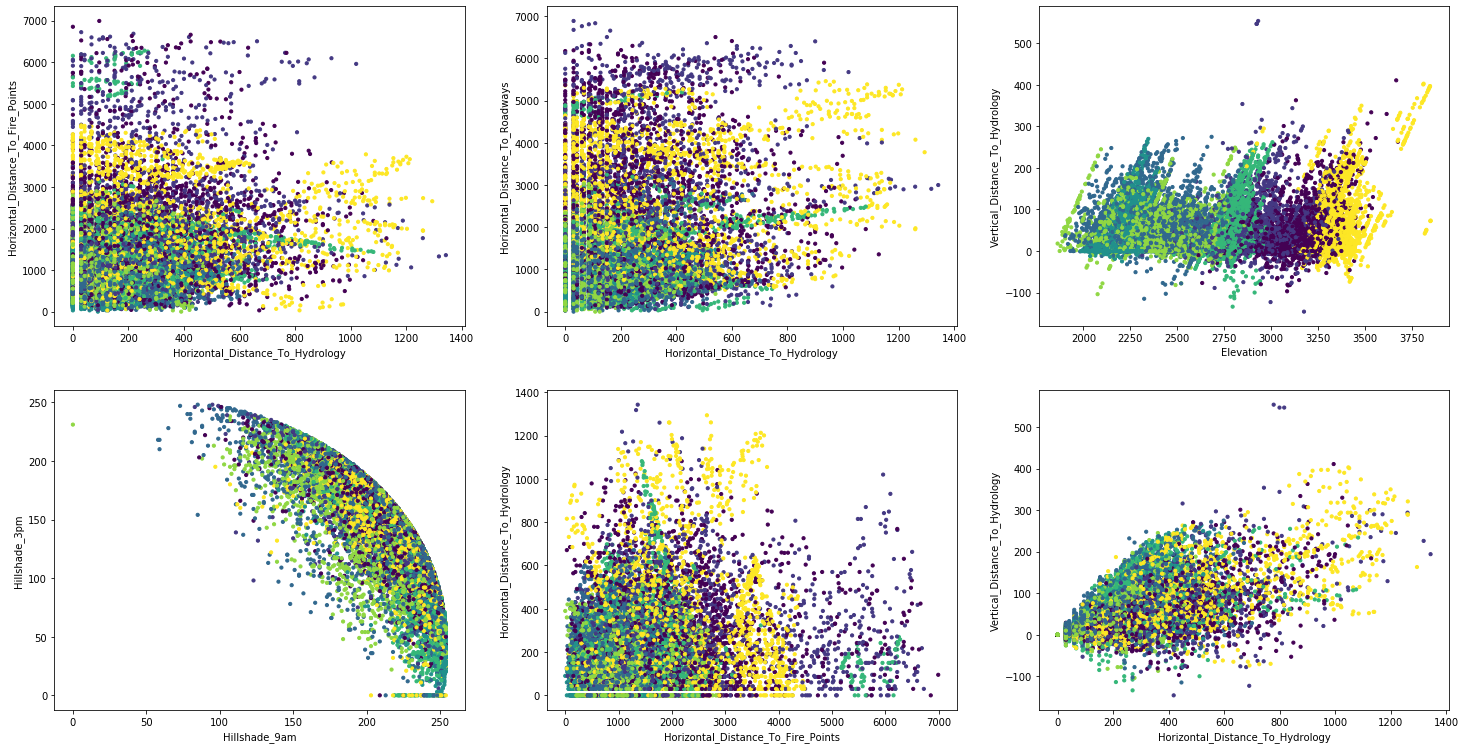

In [11]:
import matplotlib.pyplot as plt
classes = np.array(list(train.Cover_Type.values))

def plotRelation(first_feature, sec_feature):  
    plt.scatter(first_feature, sec_feature, c = classes, s=10)
    plt.xlabel(first_feature.name)
    plt.ylabel(sec_feature.name)
    
f = plt.figure(figsize=(25,20))
f.add_subplot(331)
plotRelation(train.Horizontal_Distance_To_Hydrology, train.Horizontal_Distance_To_Fire_Points)
f.add_subplot(332)
plotRelation(train.Horizontal_Distance_To_Hydrology, train.Horizontal_Distance_To_Roadways)
f.add_subplot(333)
plotRelation(train.Elevation, train.Vertical_Distance_To_Hydrology)
f.add_subplot(334)
plotRelation(train.Hillshade_9am, train.Hillshade_3pm)
f.add_subplot(335)
plotRelation(train.Horizontal_Distance_To_Fire_Points, train.Horizontal_Distance_To_Hydrology)
f.add_subplot(336)
plotRelation(train.Horizontal_Distance_To_Hydrology, train.Vertical_Distance_To_Hydrology)

As you can see there are some important relations that the model can infere from these new features according to the plots and also the correlation matrix and the heatmap. I will now add these features to the training data and the test data.
Also it seems that the vertical distance contain some negative number and it gave me better performance when taken the absolute for the column. It is really important to notice that Tree based models only fits vertical and horizontal lines so it is very important to engineer some oblique or tilted features like slope and etc... .

In [12]:
# train.head()
train['HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points'])
train['Neg_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])
train['HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])
train['Neg_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])
train['HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])
train['Neg_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])

train['Neg_Elevation_Vertical'] = train['Elevation']-train['Vertical_Distance_To_Hydrology']
train['Elevation_Vertical'] = train['Elevation']+train['Vertical_Distance_To_Hydrology']

train['mean_hillshade'] =  (train['Hillshade_9am']  + train['Hillshade_Noon'] + train['Hillshade_3pm'] ) / 3

train['Mean_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points'])/2
train['Mean_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])/2
train['Mean_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])/2

train['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])/2
train['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])/2
train['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])/2

train['Slope2'] = np.sqrt(train['Horizontal_Distance_To_Hydrology']**2+train['Vertical_Distance_To_Hydrology']**2)
train['Mean_Fire_Hydrology_Roadways']=(train['Horizontal_Distance_To_Fire_Points'] + train['Horizontal_Distance_To_Hydrology'] + train['Horizontal_Distance_To_Roadways']) / 3
train['Mean_Fire_Hyd']=(train['Horizontal_Distance_To_Fire_Points'] + train['Horizontal_Distance_To_Hydrology']) / 2 

train["Vertical_Distance_To_Hydrology"] = abs(train['Vertical_Distance_To_Hydrology'])

train['Neg_EHyd'] = train.Elevation-train.Horizontal_Distance_To_Hydrology*0.2


test['HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points'])
test['Neg_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])
test['HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])
test['Neg_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])
test['HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])
test['Neg_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])

test['Neg_Elevation_Vertical'] = test['Elevation']-test['Vertical_Distance_To_Hydrology']
test['Elevation_Vertical'] = test['Elevation'] + test['Vertical_Distance_To_Hydrology']

test['mean_hillshade'] = (test['Hillshade_9am']  + test['Hillshade_Noon']  + test['Hillshade_3pm'] ) / 3

test['Mean_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points'])/2
test['Mean_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])/2
test['Mean_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])/2

test['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])/2
test['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])/2
test['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])/2

test['Slope2'] = np.sqrt(test['Horizontal_Distance_To_Hydrology']**2+test['Vertical_Distance_To_Hydrology']**2)
test['Mean_Fire_Hydrology_Roadways']=(test['Horizontal_Distance_To_Fire_Points'] + test['Horizontal_Distance_To_Hydrology'] + test['Horizontal_Distance_To_Roadways']) / 3 
test['Mean_Fire_Hyd']=(test['Horizontal_Distance_To_Fire_Points'] + test['Horizontal_Distance_To_Hydrology']) / 2


test['Vertical_Distance_To_Hydrology'] = abs(test["Vertical_Distance_To_Hydrology"])

test['Neg_EHyd'] = test.Elevation-test.Horizontal_Distance_To_Hydrology*0.2

# 2. Dimensionality Reduction

### PCA

In [13]:
train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type', 'HorizontalH

In [14]:
train_X = train.drop(columns='Cover_Type')
train_X.shape

(15120, 71)

In [15]:
## PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(train_X)  


PCA_X = pca.fit_transform(train_X)

print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

[7.34363444e-01 2.27057193e-01 2.53411654e-02 1.21490314e-02
 6.76058107e-04 2.92099047e-04 7.58868647e-05 3.68335050e-05
 5.66249266e-06 1.92426703e-06 5.04919383e-07 1.33037139e-07
 1.57959793e-08 7.18801722e-09 4.50122032e-09 3.20297219e-09
 2.65997888e-09 2.46819643e-09 2.37492947e-09 2.25645727e-09]
[4.67228904e+05 2.59801592e+05 8.67935532e+04 6.00959222e+04
 1.41764075e+04 9.31835488e+03 4.74960487e+03 3.30899187e+03
 1.29741227e+03 7.56322195e+02 3.87422820e+02 1.98866040e+02
 6.85247491e+01 4.62251927e+01 3.65796303e+01 3.08567911e+01
 2.81198675e+01 2.70871951e+01 2.65704882e+01 2.58992825e+01]


In [16]:
PCA_df = pd.DataFrame(PCA_X)
PCA_df['target'] = train['Cover_Type']
PCA_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,target
0,4621.563751,11424.626134,-635.663687,333.048081,-34.528283,-90.524065,40.908329,-8.556678,-4.646673,-2.591829,6.097061,1.525034,0.282073,-0.452097,0.047264,-0.582164,-0.013167,-0.036267,0.019677,-0.076797,5
1,4291.306512,11481.911799,-664.557518,217.666166,-25.621046,-78.915479,44.985773,-11.554188,5.539206,-3.904326,3.662919,2.770595,0.270205,-0.453195,0.053812,-0.609067,-0.029724,-0.049913,0.017592,-0.079469,5
2,9775.909221,7292.126136,-1032.185687,420.384884,8.402663,34.859687,1.037890,-28.723679,1.025523,-0.108222,-2.025161,0.420100,0.099810,-0.042688,0.148747,0.310954,-0.031118,-0.057837,-0.023144,0.018592,2
3,9719.439729,7601.783921,-1077.842136,393.609364,22.861057,136.353504,-5.198640,-38.983156,7.362241,6.162781,1.991355,-0.735746,0.161610,-0.223328,0.247435,0.725422,-0.025687,-0.355659,-0.092413,0.130471,2
4,4204.443139,11367.423664,-728.569472,73.530109,-34.276146,-54.192098,50.974567,-12.256732,-1.476888,-3.646318,3.632439,2.804346,0.283648,-0.459702,0.052650,-0.609104,-0.026364,-0.054658,0.025149,-0.074775,5


In [17]:
train_X.shape

(15120, 71)

### LDA

In [18]:
## LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(solver='svd')
LDA_X = clf.fit_transform(train_X, train['Cover_Type'])

c:\users\wesley~1\docume~1\qmi\presen~1\intro_~1\env\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [19]:
LDA_df = pd.DataFrame(LDA_X)
LDA_df.head()

,0,1,2,3,4,5
0,-0.573318,-1.976322,-0.762564,-1.113368,2.415437,0.112112
1,-0.564008,-1.945592,-0.719960,-1.155282,2.389286,0.114814
2,-1.926809,-1.908486,-1.224068,0.767399,5.793892,1.218655
3,-0.873604,-1.767085,-0.527232,-2.938113,1.150131,0.432213
4,-0.598826,-1.897824,-0.723437,-1.178380,2.284662,0.036548


For the chi squared transformation we must first translate values to be positive

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
temp_X = scaler.fit_transform(train_X)

In [21]:
## Using a model to estimate importance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

CHI_X = SelectKBest(chi2, k=20).fit_transform(temp_X, train['Cover_Type'])

CHI_df = pd.DataFrame(CHI_X)
CHI_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.369084,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.389866,0.304770,0.385086
1,0.366062,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.389866,0.299705,0.386833
2,0.473817,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.463806,0.420008,0.497543
3,0.464250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.426577,0.434360,0.490010
4,0.368580,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.389866,0.303926,0.396004


fitting using a baseline model

# 3. Evaluation Metrics

Now we should seperate the training set from the labels and name them x and y then we will split them into training and test sets to be able to see how well it would do on unseen data which will give anestimate on how well it will do when testing on Kaggle test data. I will use the convention of using 80% of the data as training set and 20% for the test set.

In [22]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,HorizontalHydrology_HorizontalFire,Neg_HorizontalHydrology_HorizontalFire,HorizontalHydrology_HorizontalRoadways,Neg_HorizontalHydrology_HorizontalRoadways,HorizontalFire_Points_HorizontalRoadways,Neg_HorizontalFire_Points_HorizontalRoadways,Neg_Elevation_Vertical,Elevation_Vertical,mean_hillshade,Mean_HorizontalHydrology_HorizontalFire,Mean_HorizontalHydrology_HorizontalRoadways,Mean_HorizontalFire_Points_HorizontalRoadways,MeanNeg_Mean_HorizontalHydrology_HorizontalFire,MeanNeg_HorizontalHydrology_HorizontalRoadways,MeanNeg_HorizontalFire_Points_HorizontalRoadways,Slope2,Mean_Fire_Hydrology_Roadways,Mean_Fire_Hyd,Neg_EHyd
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,6537,-6021,768,-252,6789,5769,2596,2596,200.333333,3268.5,384.0,3394.5,-3010.5,-126.0,2884.5,258.000000,2349.000000,3268.5,2544.4
1,2590,56,2,212,6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,6437,-6013,602,-178,6615,5835,2596,2584,202.000000,3218.5,301.0,3307.5,-3006.5,-89.0,2917.5,212.084889,2275.666667,3218.5,2547.6
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6389,-5853,3448,-2912,9301,2941,2739,2869,202.333333,3194.5,1724.0,4650.5,-2926.5,-1456.0,1470.5,275.769832,3189.666667,3194.5,2750.4
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,6453,-5969,3332,-2848,9301,3121,2667,2903,199.333333,3226.5,1666.0,4650.5,-2984.5,-1424.0,1560.5,269.235956,3181.000000,3226.5,2736.6
4,2595,45,2,153,1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,6325,-6019,544,-238,6563,5781,2596,2594,201.333333,3162.5,272.0,3281.5,-3009.5,-119.0,2890.5,153.003268,2238.666667,3162.5,2564.4


In [23]:
from sklearn.model_selection import train_test_split

x = train.drop(['Cover_Type'], axis = 1)
y = train['Cover_Type']

x_train, x_test, y_train, y_test = train_test_split( x.values, y.values, test_size=0.05, random_state=42 )

### K fold Validation

In [24]:
def fold_generator(x, y, groups=None, num_folds=10, shuffle=True, seed = 4200):
    folds = KFold(num_folds, shuffle=shuffle, random_state=seed)
    for train_index, test_index in folds.split(x, y, groups):
        yield train_index, test_index

## ROC AUC Score

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_roc_001.png)

It is important to know if the number of points in the classes are balanced. If the data is skewed then we will not be able to use accuracy as a performance metric since it will be misleading but if it is skewed we may use F-beta score or precision and recall.

In [25]:
unique, count= np.unique(y_train, return_counts=True)
print("The number of occurances of each class in the dataset = %s " % dict (zip(unique, count) ), "\n" )

The number of occurances of each class in the dataset = {1: 2047, 2: 2057, 3: 2036, 4: 2071, 5: 2048, 6: 2061, 7: 2044}  



However, it seems the data points in each class are almost balanced so it will be okay to use accuracy as a metric to measure how well the ML model performs

# 4. Pipeline Tools Creation

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV

def make_pipeline(estimator):
    pipeline = Pipeline([
        # Each item is a tuple with a name and a transformer or estimator
        ('scaler', StandardScaler()),
        ('model', estimator)
    ])
    return pipeline

In [27]:
def search_cv(x, y, pipeline, grid, max_iter=None, num_folds=10, shuffle=True):
    """Search hyperparameters and returns a estimator with the best combination found."""
    t0 = time.time()
    
    cv = fold_generator(x, y, num_folds=num_folds)
    if max_iter is None:
        search = GridSearchCV(pipeline, grid, cv=cv,
                              scoring='accuracy',verbose=2)
    else:
        search = RandomizedSearchCV(pipeline, grid, n_iter=max_iter, cv=cv,
                                    scoring='accuracy')
    search.fit(x, y)
    
    t0 = time.time() - t0
    print("Best CV score: {:.4f}, time: {:.1f}s".format(-search.best_score_, t0))
    print(search.best_params_)
    return search.best_estimator_

In [28]:
def make_predictions(x, y, pipeline, num_folds=10, shuffle=True, test=None, plot=True):
    """Train, make predictions (oof and test data) and plot."""
    if test is not None:
        sub_prediction = np.zeros(test.shape[0])
        
    oof_prediction = np.zeros(x.shape[0])
    for tr_idx, val_idx in fold_generator(x, y, num_folds=num_folds):
        pipeline.fit(x.iloc[tr_idx], y.iloc[tr_idx])
        oof_prediction[val_idx] = pipeline.predict(x.iloc[val_idx])

        if test is not None:
            sub_prediction += pipeline.predict(test) / num_folds
    
    if plot:
        plot_predictions(y, oof_prediction)
    if test is None:
        return oof_prediction
    else:
        return oof_prediction, sub_prediction

In [29]:
def plot_predictions(y, oof_predictions):
    """Plot out-of-fold predictions vs actual values."""
    fig, axis = plt.subplots(1, 2, figsize=(14, 6))
    ax1, ax2 = axis
    ax1.set_xlabel('actual')
    ax1.set_ylabel('predicted')
    ax1.set_ylim([-5, 20])
    ax2.set_xlabel('train index')
    ax2.set_ylabel('time to failure')
    ax2.set_ylim([-2, 18])
    ax1.scatter(y, oof_predictions, color='brown')
    ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
    ax2.plot(y, color='blue', label='y_train')
    ax2.plot(oof_predictions, color='orange')

# 5. Baseline Model(s)

Default method

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf_rf = RandomForestClassifier()

clf_rf.fit(x_train,y_train)
predictions = clf_rf.predict(x_test)

accuracy_score(predictions, y_test)

c:\users\wesley~1\docume~1\qmi\presen~1\intro_~1\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8783068783068783

### Using a Model to select features

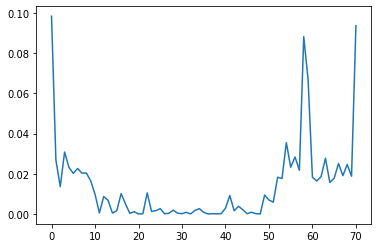

In [31]:
plt.plot(clf_rf.feature_importances_)

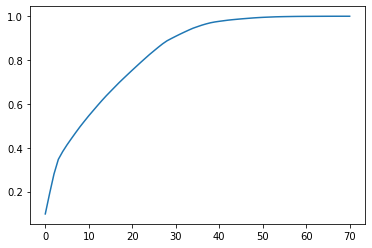

In [45]:
from numpy import cumsum
values = list(clf_rf.feature_importances_)
values.sort(reverse=True)
result = list(cumsum(values))

plt.plot(result)

![](http://scikit-learn.org/stable/_static/ml_map.png)

#### We will focus on these models

1. RF
2. AdaBoost
3. SVMs
4. KNN
5. Naive Bayes

In [32]:
# method for returning accuracy

def find_accuracy(x,y,estimator):
    estimator.fit(x_train,y_train)
    predictions = estimator.predict(x_test)
    return accuracy_score(predictions, y_test)

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

estimators = {
    'Random_Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes' : GaussianNB()
}

In [34]:
baseline = {}

for key,value in estimators.items():
    print("Completed",key)
    baseline[key] = find_accuracy(x_train,y_train,value)

Completed Random_Forest


c:\users\wesley~1\docume~1\qmi\presen~1\intro_~1\env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Completed AdaBoost
Completed SVM


c:\users\wesley~1\docume~1\qmi\presen~1\intro_~1\env\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Completed KNN
Completed Naive Bayes


In [35]:
display(baseline)

{'Random_Forest': 0.8875661375661376,
 'AdaBoost': 0.421957671957672,
 'SVM': 0.11904761904761904,
 'KNN': 0.8174603174603174,
 'Naive Bayes': 0.6124338624338624}

## 6. Parameter Tuning

In [46]:
clf_rf = RandomForestClassifier()
rf_param_grid = {'bootstrap': [True, False],
                 'max_depth': [10, 20, 40, 50, 70, 90, 100, None],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_leaf': [1, 2, 4],
                 'min_samples_split': [2, 5, 10],
                 'n_estimators': [200, 400, 600, 800, 1000, 1400, 1800, 2000]
}

rf_param_grid_small = {
    'n_estimators': [200, 400, 600, 800, 1000, 1400, 1800, 2000]
}

grid = GridSearchCV(clf_rf, param_grid = rf_param_grid_small, cv=3, scoring='accuracy', verbose = 4)
grid.fit(x_train, y_train)

print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(x_test, y_test) * 100 ) )

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] n_estimators=200 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=200, score=0.877, total=   5.7s
[CV] n_estimators=200 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV] .................... n_estimators=200, score=0.880, total=   6.2s
[CV] n_estimators=200 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.8s remaining:    0.0s


[CV] .................... n_estimators=200, score=0.869, total=   6.9s
[CV] n_estimators=400 ................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.7s remaining:    0.0s


[CV] .................... n_estimators=400, score=0.876, total=  11.6s
[CV] n_estimators=400 ................................................
[CV] .................... n_estimators=400, score=0.883, total=  10.8s
[CV] n_estimators=400 ................................................
[CV] .................... n_estimators=400, score=0.871, total=  10.7s
[CV] n_estimators=600 ................................................
[CV] .................... n_estimators=600, score=0.878, total=  16.7s
[CV] n_estimators=600 ................................................
[CV] .................... n_estimators=600, score=0.883, total=  17.9s
[CV] n_estimators=600 ................................................
[CV] .................... n_estimators=600, score=0.871, total=  16.2s
[CV] n_estimators=800 ................................................
[CV] .................... n_estimators=800, score=0.875, total=  21.4s
[CV] n_estimators=800 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 12.7min finished


The best parameters are {'n_estimators': 1800} with a score of 88
Best estimator accuracy on test set 90.08 


The last thing to do now is to predict on the test set and output the results into a csv file.

In [49]:
clf_best = grid.best_estimator_

In [50]:
display(clf_best)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
#Uncomment the commented code and comment the other line to run the grid search predict

clf_best = grid.best_estimator_

print('Accuracy of best classifier on training set: {:.2f}'.format(clf_best.score(x_train, y_train) * 100))
print('Accuracy of best classifier on test set: {:.2f}'.format(clf_best.score(x_test, y_test) * 100))

# predictions = grid.best_estimator_.predict(test)
#predictions = clf_best.predict(test)


Accuracy of best classifier on training set: 100.00
Accuracy of best classifier on test set: 90.08


## 7. Stacking Models

### Customized Classifier

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
class CustomClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, demo_param='demo'):
        self.demo_param = demo_param

    def fit(self, X, y):

        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)

        self.X_ = X
        self.y_ = y
        # Return the classifier
        return self

    def predict(self, X):

        # Check if fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X)

        closest = np.argmin(euclidean_distances(X, self.X_), axis=1)
        return self.y_[closest]
    
    def get_params(self, deep=True):
    # suppose this estimator has parameters "alpha" and "recursive"
        return {"alpha": self.alpha, "recursive": self.recursive}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

### Voting Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',
                          random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(iris.data, iris.target)

### Soft-Voting (Weighted voting)

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma='scale', kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1 = clf1.fit(X, y)
clf2 = clf2.fit(X, y)
clf3 = clf3.fit(X, y)
eclf = eclf.fit(X, y)